# <font color='blue'>Project - NLP: Sentiment Analysis : Twitter US Airline Sentiment</font>


*Subroto Singh*


![Airline ](https://www.goolgule.com/wp-content/uploads/2016/02/feedback.gif "Airline")

### Goal
<font color=blue> <font size="3">To implement the techniques of Natural Language Processing (NLP) and evaluate the performance of the model</font>

**Data Description:** 


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). 

**Dataset** 


The project is from a dataset from Kaggle.  
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment  
The dataset has to be downloaded from the above Kaggle website. 


The dataset has the following columns: 

*	tweet_id
*	airline_sentiment
*	airline_sentiment_confidence
*	negativereason 
*	negativereason_confidence 
*	airline 
*	airline_sentiment_gold 
*	name 
*	negativereason_gold 
*	retweet_count 
*	text 
*	tweet_coord 
*	tweet_created 
*	tweet_location 
*	user_timezone

**Objective:** 


To implement the techniques learnt as a part of the course. 

**Learning Outcomes:**


*	Basic understanding of text pre-processing. 
*	What to do after text pre-processing:  
*		Bag of words 
*		Tf-idf 
*	Build the classification model. 
*	Evaluate the Model.

# <font color='blue'>Step 1</font>

**Import the libraries, load dataset, print shape of data, data description**

**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re, string, unicodedata
from bs4 import BeautifulSoup

!pip install contractions
import nltk
import contractions

nltk.download('wordnet')
nltk.download('punkt')

from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/subrotosingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/subrotosingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

**Load dataset**

In [3]:
#Tweet= pandas.read_csv("../input/Tweets.csv")
#Tweet.head()

#project_path =  '/kaggle/input/twitter-airline-sentiment/'

# Load the dataset
tweet_data = pd.read_csv('/users/subrotosingh/AIML/Tweets.csv')

In [4]:
tweet_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Shape of data**

In [5]:
# There are 14640 rows and 15 columns in the tweet data
print(tweet_data.shape)

(14640, 15)


In [6]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
tweet_data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

**Checking if data is duplicated and removing duplicates**

In [8]:
# Check for duplicate rows
duplicateRowsDF = tweet_data[tweet_data.duplicated()]
print(duplicateRowsDF.head())
print(duplicateRowsDF.shape)  
# There are 36 duplicate rows

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
12040  570308309682675712          negative                           1.0   
12059  570305051819941889           neutral                           1.0   
12063  570303383782989824           neutral                           1.0   
12066  570301929580048385           neutral                           1.0   
12068  570301395141836801          negative                           1.0   

               negativereason  negativereason_confidence   airline  \
12040  Customer Service Issue                        1.0  American   
12059                     NaN                        NaN  American   
12063                     NaN                        NaN  American   
12066                     NaN                        NaN  American   
12068             Late Flight                        1.0  American   

      airline_sentiment_gold            name negativereason_gold  \
12040                    NaN      SweeLoTmac    

In [9]:
# Drop the duplicate rows
tweet_data.drop_duplicates(keep=False,inplace=True) 

In [10]:
# There are 14568 rows and 15 columns after dropping 36 duplicate rows from the initial load dataset
print(tweet_data.shape)

(14568, 15)


**Description of Data**

In [11]:
tweet_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.456800e+04,14568.000000,10484.000000,14568.000000
mean,5.692131e+17,0.899675,0.636987,0.082921
std,7.773880e+14,0.163080,0.330318,0.747520
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685551e+17,0.691975,0.360300,0.000000
50%,5.694655e+17,1.000000,0.670400,0.000000
75%,5.698859e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


**Explorotary data Analysis   EDA**

**Sentiment Analysis for each Airline**

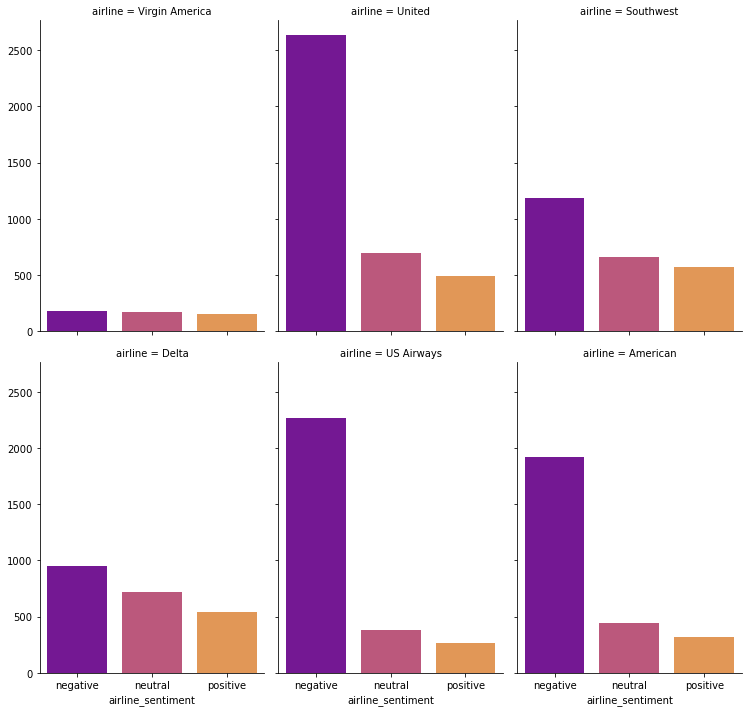

In [12]:
g = sns.FacetGrid(tweet_data, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =tweet_data.airline_sentiment.value_counts().index, palette='plasma')
plt.show()
# Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
# Virgin America has the least number of negative reviews

**Most Common negative review reasons**

Customer Service Issue         2898
Late Flight                    1655
Can't Tell                     1190
Cancelled Flight                839
Lost Luggage                    718
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     479
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


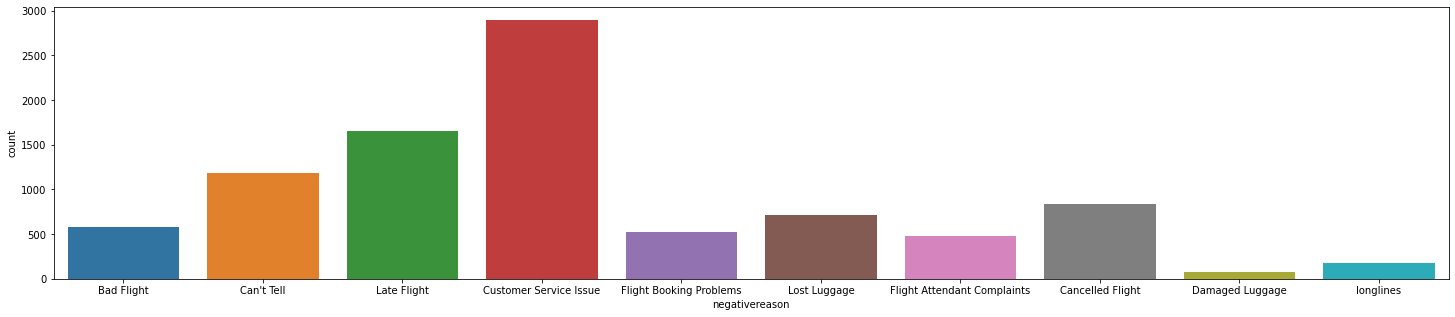

In [13]:
# Check the most common negative reason 
y = tweet_data['negativereason']
print(y.value_counts())
plt.figure(figsize=(25,5)) 
g = sns.countplot(y)
# Customer service and Late flight seems to be the main reason why customers are giving bad feedback

**Summary Part 1**

---



*   There are 14640 rows and 15 columns in the tweet data
*   There are 36 duplicate records in the data set
*   Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
*   Virgin America has the least number of negative reviews
*   Customer service and Late flight seems to be the main reason why customers are giving bad feedback



# <font color='blue'>Step 2</font>

**Understand of data-columns:**

a. Drop all other columns except “text” and “airline_sentiment”. 

b. Check the shape of data. 

c. Print first 5 rows of data. 

In [14]:
tweet_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Drop Irrelevant columns**

In [15]:
# Let us now remove irrelevant columns
tweet_data_relevant = tweet_data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

**Shape of Data**

In [16]:
# There are 14568 rows and 2 columns (This is result of keeping relevant rows and duplicate data cleanup)
tweet_data_relevant.shape

(14568, 2)

**Printing first 5 rows of data**

In [17]:
tweet_data_relevant.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [18]:
print(tweet_data_relevant.airline_sentiment.value_counts())

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


**Is the data balanced**

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


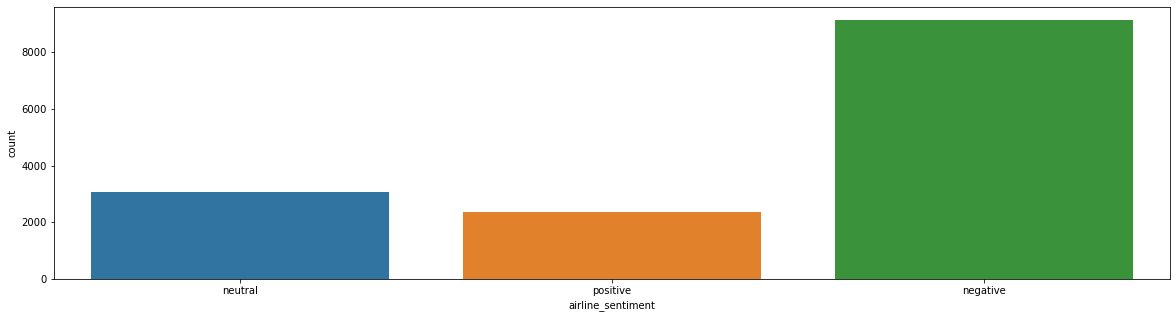

In [19]:
y = tweet_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

**Summary Part 2**

*   There data is not balanced, The percentage of negative sentiment is high
*   There are 14568 rows in the dataset after duplicate data cleanup

# <font color='blue'>Step 3</font>

**Text pre-processing: Data preparation. **

*	a. Html tag removal. 
*	b. Tokenization. 
*	c. Remove the numbers. 
*	d. Removal of Special Characters and Punctuations. 
*	e. Conversion to lowercase. 
*	f. Lemmatize or stemming. 
*	g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.) 
*	h. Print first 5 rows of data after pre-processing.

**Html tag removal**

In [20]:
def perform_html_cleanup( raw_review ):
  # 1. Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

**Replace Contraction**

In [21]:
def replace_contractions(raw_review):
    #Replace contractions in raw_review
    return contractions.fix(raw_review)

**Tokenization**

In [22]:
def perform_tokenization( raw_review ):
  # 2. Perform Tokenization
  word_tokens = word_tokenize(raw_review)  # Tokenization
  return word_tokens

**Removal of Numbers**

In [23]:
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

**Remove special characters and punctuations**

In [24]:
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [25]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

**Conversion to Lower case**

In [26]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

**Remove empty String**

In [27]:
def remove_empty_string(words):
  return list(filter(None, words))

**Stemming**

In [28]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

**Lemmatization**

In [29]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

**Complete Pre-preocessing**

In [30]:
def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    #clean_review = stem_words(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [31]:
print(tweet_data_relevant.head())

  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


**Join the words in the list to convert back to text string in the dataframe**


(So that each row contains the data in text format.)

In [32]:
clean_reviews = []

for i, row in tweet_data_relevant.iterrows():
    words = tweet_data_relevant.at[i, 'text']
    words = perform_cleanup(words)
    tweet_data_relevant.at[i,'text'] = " ".join( words )
    clean_reviews.append( tweet_data_relevant.at[i, 'text'] )
tweet_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


**Print first 5 rows of data after pre-processing**

In [33]:
tweet_data_relevant.head(5)

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


# <font color='blue'>Step 4</font>

**Vectorization: )**


a. Use CountVectorizer.

b. Use TfidfVectorizer

**CountVectorizer**

In [34]:
print ("Creating the bag of words...\n")
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
count_vectorizer_data_features = count_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
count_vectorizer_data_features = count_vectorizer_data_features.toarray()

Creating the bag of words...



In [35]:
print (count_vectorizer_data_features.shape)
print(count_vectorizer_data_features)

(14568, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Vocabulary**

In [36]:
# Take a look at the words in the vocabulary
count_vectorizer_vocab = count_vectorizer.get_feature_names()
print (count_vectorizer_vocab)

['aa', 'aacom', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'about', 'above', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'acct', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'after', 'afterall', 'afternoon', 'again', 'against',

**Stop words**

In [37]:
count_vectorizer_stop_words = count_vectorizer.get_stop_words()
print (count_vectorizer_stop_words)
# There are no stop words since we are doing sentiment analysis

None


**Sum up the counts of each vocabulary word**

In [38]:
# Sum up the counts of each vocabulary word
dist = np.sum(count_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(count_vectorizer_vocab, dist):
    print (count, tag)

274 aa
3 aacom
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 abandon
8 abc
3 abcnetwork
2 abilities
5 ability
119 able
4 aboard
509 about
18 above
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
7 abt
3 abuse
6 abysmal
9 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
80 account
6 accountability
2 accrue
11 acct
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
2 activitiesprevention
21 actual
86 actually
4 ad
2 adam
126 add
4 addition
17 additional
52 address
3 addtl
2 adjacent
5 admiral
12 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
24 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
467 after
2 afterall
30 afternoon
391 again
6 against
15 age
6 agency
258 agent
155 agents
3 aggravate


2 dakota
16 dal
2 dalaus
2 dale
78 dallas
2 dallasaustin
5 dallaslovefield
2 dallasnews
25 damage
22 damn
2 danahajek
8 dance
5 dang
2 danger
3 dare
4 dark
5 darn
6 data
49 date
28 daughter
6 daughters
10 david
2 dawn
336 day
230 days
4 daytona
60 dc
102 dca
3 dcabos
2 dcoadavon
6 de
2 deactivate
13 dead
3 deadhead
3 deaf
103 deal
2 deane
7 dear
14 death
4 debacle
2 debate
2 debit
7 december
3 decency
7 decent
19 decide
10 decision
6 decisions
4 deck
3 decline
2 dedicate
2 deedee
7 deep
4 def
2 defend
9 define
22 definitely
4 definition
2 definitive
2 deflator
8 degree
9 degrees
21 deice
2 del
983 delay
3 delayedcancelled
3 delayscancelled
7 delete
4 delhi
2 delicious
4 delight
56 deliver
19 delivery
108 delta
4 deltaassist
2 demand
2 demo
47 den
2 denairport
80 denver
2 denverairport
24 deny
2 deodorant
4 dep
70 depart
19 department
92 departure
9 departures
4 depend
23 deplane
4 deplorable
18 dept
4 derekc
3 derrick
2 des
6 describe
2 desert
26 deserve
14 design
3 desire
68 desk
6 de

2 nbc
3 nbr
2 nburnside
17 nc
54 nd
12 near
6 nearby
14 nearly
5 necessary
684 need
2 needcoffee
2 negative
5 neglect
4 negligence
5 negotiate
3 neighbor
7 neither
3 nephew
5 neptune
2 nerdbird
6 nervous
4 network
319 never
27 neveragain
3 neverflyvirginforbusiness
266 new
62 newark
2 newburgh
3 newly
2 neworleans
30 news
4 newyork
235 next
2 nexttimeiwillflysouthwest
8 nexus
5 nh
2 nhlonnbcsports
132 nice
2 nicedismissive
6 nicely
4 nicer
3 nicest
2 nigga
150 night
21 nightmare
7 nights
2 ninadavuluri
3 nine
4 nite
2 nitrogen
10 nj
8 njb
2 nm
1476 no
16 nobody
2 nocareforcustomers
2 nocrew
4 nocustomerservice
2 noexcuses
2 nofun
2 nogood
4 nola
4 nolove
30 non
25 none
5 nonexistent
3 nonprofit
2 nonrefundable
5 nonsense
27 nonstop
2 nonweather
7 noon
3 noone
3 noooo
30 nope
2 noplacelikehome
10 nor
4 norfolk
4 norm
2 norma
12 normal
4 normally
6 north
5 northeast
2 noservice
3894 not
5 notch
8 notcool
36 note
3 notgoodenough
3 nothanks
14 nothappy
2 nothin
154 nothing
34 notice
22 not

2 tcoenaxbues
2 tcoetfjqiwuvt
4 tcoflfulcbq
4 tcofqxelbon
2 tcogxdqortss
2 tcohjkqchn
2 tcohxlnvzknp
2 tcoipgeicsm
1 tcojorescfbx
1 tcojpdnsgrt
1 tcojvjzzaa
1 tcojwlglrw
1 tcokacyawdbw
1 tcokaejgchd
1 tcokbbbfxmk
1 tcokbhymgkap
1 tcokbtzvjub
1 tcokcddoduff
1 tcokcqebeejs
1 tcokcqnwixucm
1 tcokcvubuyexc
1 tcoknuvuovhub
1 tcokpmrf
1 tcokpyhckal
1 tcokqlhvapg
1 tcokqnrrpa
1 tcoktkhsmgy
1 tcolchvjolidg
1 tconhizlzmk
1 tconkdcsxu
1 tconklozcntto
1 tconklwssvrq
1 tconlrfouay
1 tconlzsehnee
1 tconmbhngnmki
1 tconmvnnfkb
1 tconofgtqhyn
1 tcontuixdbyr
1 tconuhplnxriq
1 tconustgpelsf
1 tconuvclmada
1 tconvgenpib
1 tconvkirgkp
1 tconvlnglnmgn
1 tconwffkafy
1 tconwinfuc
1 tconwvxdgmf
1 tconxqijcojnj
1 tconxzhbbmt
1 tconycsjruv
1 tconytuxfqf
1 tconyvvxd
1 tconzdxrvszwv
1 tconzhqoazo
1 tcooadrfaoq
1 tcooaflfrwxb
3 tcoojrsdwpkk
2 tcooquksoso
4 tcorfxlvkgdh
3 tcormpkogwu
2 tcotrdrcre
2 tcovhgkitzsaw
3 tcowbzorrnc
2 tcoywxrfngr
2 tcozikuoxgnw
10 tea
9 teach
111 team
6 tear
11 tech
8 technical
6 technic

**TfidfVectorizer**

In [39]:
# Initialize the "TfidfVectorizer" object
# Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [40]:
print (tfidf_vectorizer_data_features.shape)
print(tfidf_vectorizer_data_features)

(14568, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Vocabulary**

In [41]:
# Take a look at the words in the vocabulary
tfidf_vectorizer_vocab = tfidf_vectorizer.get_feature_names()
print (tfidf_vectorizer_vocab)

['aa', 'aa be', 'aadvantage', 'able', 'able to', 'about', 'about an', 'about it', 'about my', 'about our', 'about the', 'about this', 'about to', 'about you', 'about your', 'above', 'absolute', 'absolutely', 'absurd', 'accept', 'acceptable', 'access', 'access to', 'accommodate', 'accord', 'accord to', 'account', 'acct', 'accurate', 'across', 'act', 'action', 'actual', 'actually', 'add', 'add my', 'add to', 'additional', 'address', 'admirals', 'admirals club', 'advance', 'advantage', 'advertise', 'advise', 'advisory', 'affect', 'afford', 'after', 'after an', 'after be', 'after hours', 'after land', 'after my', 'after the', 'after wait', 'afternoon', 'again', 'again for', 'again you', 'age', 'agent', 'agent at', 'agent be', 'agents', 'agents at', 'agents be', 'ago', 'ago and', 'ago be', 'ah', 'ahead', 'air', 'aircraft', 'airfare', 'airline', 'airline be', 'airline ever', 'airline have', 'airline in', 'airline that', 'airline to', 'airlines', 'airlines be', 'airplane', 'airport', 'airport

**Stop Words**

In [42]:
tfidf_vectorizer_stop_words = tfidf_vectorizer.get_stop_words()
print (tfidf_vectorizer_stop_words)

None


**Sum up the counts of each vocabulary word**

In [43]:
# Sum up the counts of each vocabulary word
tf_df_dist = np.sum(tfidf_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(tfidf_vectorizer_vocab, tf_df_dist):
    print (count, tag)

52.705269152597175 aa
3.434580932625993 aa be
2.8881421447748004 aadvantage
24.028604652742 able
22.32272841350404 able to
85.98234644363532 about
3.3958158600282973 about an
7.441203796937837 about it
10.434408304125572 about my
3.0737648996444693 about our
14.54949642271992 about the
4.449420712255863 about this
6.140920532035146 about to
4.045596592963875 about you
5.7763112619914665 about your
5.2689766214621185 above
6.8420621323973 absolute
9.941320276829094 absolutely
3.7819195099728677 absurd
9.297135721408312 accept
6.297749641217486 acceptable
10.700328429977638 access
5.686845308942884 access to
7.182452765487747 accommodate
3.225372331006247 accord
3.225372331006247 accord to
18.60978988024219 account
3.1936841583134017 acct
3.006936634912148 accurate
4.73879742489274 across
5.375902054148581 act
4.147578089578858 action
5.703394635701907 actual
20.448931236360547 actually
29.324847030099125 add
4.660047407291712 add my
3.942899283974997 add to
4.727049371897428 additional


19.778907046720104 be fly
9.586562360129673 be for
2.741855167788576 be force
3.127755708228824 be from
3.6028415326095846 be frustrate
4.102862135378333 be full
12.839148975268479 be get
8.2704609523037 be give
4.105522413077139 be glad
31.873534109918424 be go
11.094884901929177 be good
18.147395783627797 be great
4.814208831448377 be hang
5.298537703633233 be happen
4.003424846046967 be happy
8.763156189748027 be have
4.253688752470118 be head
3.643214800409009 be help
4.11708709639134 be helpful
8.202389961670525 be here
6.567056885210984 be hold
4.05016814849581 be home
3.180933149909899 be honest
4.585431561199103 be hop
5.386336742304247 be horrible
3.9172263724297784 be hours
4.142255409274 be how
2.9081768713324676 be hrs
36.07031975382313 be in
25.202465842718578 be it
6.211316834518079 be joke
21.905846230868484 be just
3.595902040646447 be kill
8.295601828424195 be late
6.674968947709676 be leave
3.2765140029398303 be less
6.236151139475362 be like
3.210696782571527 be load

4.5167400726881635 dca to
3.845320306817043 dead
25.256865541147896 deal
11.78465512894115 deal with
4.257229423819961 death
5.001561297505592 decide
3.320548113791214 decide to
3.2713936100526593 decision
3.2630572841328283 define
9.115080827800028 definitely
2.9457558333887848 degrees
6.0097788969611345 deice
141.30500633281684 delay
4.765405397196538 delay again
12.593048202693858 delay and
2.7545967773946733 delay at
8.135513350151609 delay be
4.433525682395747 delay because
3.9936676848408266 delay but
3.1600233638227233 delay by
8.026848698433763 delay due
17.489324127086782 delay flight
8.39643659972288 delay for
4.123210694799265 delay from
5.960267382661073 delay hours
4.133220421808345 delay hrs
4.843340572224623 delay in
4.771952577961903 delay my
2.3389327806438556 delay now
5.002425369953203 delay on
3.802825031891951 delay or
2.8293027633111962 delay over
4.769400002580926 delay so
2.727739017234473 delay the
6.452676607425123 delay to
13.127933328738655 deliver
2.4621636

21.95268300994026 happy
5.252722948487478 happy to
13.016420937908322 hard
5.821870797539526 hard to
5.29233735211838 hat
12.739021171166838 hate
325.04367970421254 have
3.729683043226003 have all
6.412699135843799 have already
13.140212814092894 have an
2.9616821148704497 have and
8.771887224683928 have any
81.93513996942274 have be
3.1144248958414593 have better
3.2137055568265596 have board
3.0267090610023257 have book
4.311434157069475 have call
4.462355746989883 have cancel
4.7961952573914095 have do
13.09705493980713 have ever
9.831635662044661 have flight
6.657518509686149 have fly
9.128715867468513 have get
2.630350822950839 have go
3.940040789224678 have good
7.901646302594806 have great
10.960712404874785 have have
7.173005233772489 have it
3.015945377534767 have just
4.871614986189233 have lose
5.492748646024189 have make
7.485652566489601 have me
4.969490940524688 have more
11.276560406573868 have my
10.530268071794085 have never
19.17558432572326 have no
35.22595760631911 

7.910445170920356 minutes on
5.447900906167633 minutes to
3.193617134056359 miserable
68.69290082026465 miss
7.122765611864178 miss connection
5.279562465820975 miss connections
5.730530793446196 miss flight
19.334051326933686 miss my
6.347804853969525 miss our
7.532835381685471 miss the
7.813871630743959 mistake
3.248025541798251 mke
9.599226866720592 mobile
4.165143655757964 model
7.7565343654691485 mom
4.1516871882706194 moment
13.303702666676582 monday
21.011331136839527 money
2.98136739634003 money back
11.223404219942886 month
10.715055109558099 months
4.080143087665492 months ago
68.90607571639605 more
3.083575093019472 more delay
2.6859742717656 more flight
3.5170939673054114 more people
14.951887389855376 more than
34.91677122987659 morning
18.62170603695268 most
3.7324614847561612 most of
4.070758903836904 mother
19.373956157912694 move
2.8408994682752167 move my
4.909723486201672 move to
3.7761379766952934 msg
2.975121276378069 msp
49.799653500767185 much
4.257322517016606 m

12.182631792541155 read
11.76132756479407 ready
6.466740455873506 ready to
3.1367408613691343 reagan
15.219997053855131 real
3.6509033018516983 real person
5.7893883707348195 realize
59.78279358485591 really
3.3389454299957366 really do
4.076925671059414 really need
19.31593061427874 reason
26.43691750249563 rebook
2.795137986276848 rebook flight
4.0345443445428435 rebook me
2.73273594878094 rebook my
29.3209905883316 rebooked
3.998990981653108 rebooked for
2.461846408320274 rebooked me
3.9604941610395947 rebooked on
7.155540213298653 receipt
26.111781848254935 receive
3.7621492371338614 receive an
3.175342851616651 receive my
3.5440223521680836 recent
3.9174292558223205 recommend
12.294054775717017 record
4.664977598186403 red
5.775105008261935 redeem
4.07052386867436 reference
12.305394218550212 reflight
12.305394218550212 reflight book
37.48165871387909 refund
3.293989345974464 refund for
2.3996577898031695 refund me
11.000181931341238 refuse
7.9058385496273 refuse to
7.084102137599

46.5777442371702 think
5.371752946847389 think about
4.564844575274545 think be
6.561142931443651 think it
7.452872535176773 think you
4.961350636906829 third
181.4378195658244 this
3.6931736737347243 this afternoon
6.521890170649067 this airline
59.66736004071569 this be
3.1714334473353123 this delay
4.8417066809503355 this even
9.183990480372529 this flight
4.315908990150601 this happen
5.684827451370393 this have
3.333853988582665 this issue
17.951687563136513 this morning
5.095158805164853 this one
8.496603474270989 this plane
3.3771878332652987 this point
4.767813875818851 this time
3.042856708379289 this to
3.4240216048979804 this trip
5.803372625200901 this week
4.359300540580266 this weekend
4.822017560245606 this year
7.3051643863254805 thnx
6.376647260448087 tho
18.62313538509103 those
21.792030960476893 though
16.313876348781882 three
4.219218320696827 three hours
43.147889760769246 through
4.002827628450445 through on
6.071103177864869 through the
8.847735356998838 through 

# <font color='blue'>Step 5</font>

**Fit and evaluate model using both type of vectorization. **

**RandomForest Classifier on CountVectorizer**

In [44]:
tweet_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


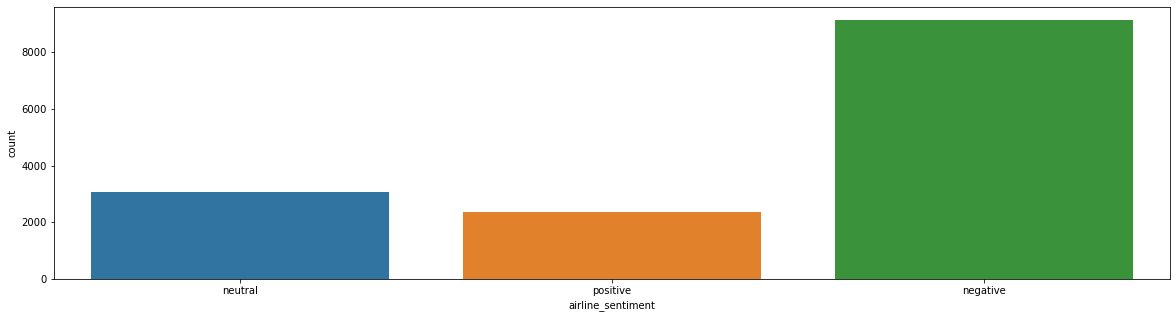

In [45]:
y = tweet_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

**Dividing Data to Train and Test**

In [46]:
x = count_vectorizer_data_features     # Predictor feature columns
y = tweet_data_relevant['airline_sentiment']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


**Applying SMOTE since the data is not balanced**

In [48]:
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(x_train, y_train)

In [49]:
print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(19266, 5000)
(19266,)


In [50]:
y_train_SMOTE

0        negative
1        negative
2        positive
3        negative
4        negative
           ...   
19261    positive
19262    positive
19263    positive
19264    positive
19265    positive
Name: airline_sentiment, Length: 19266, dtype: object

**Checking if data is balanced after applying SMOTE**

neutral     6422
negative    6422
positive    6422
Name: airline_sentiment, dtype: int64


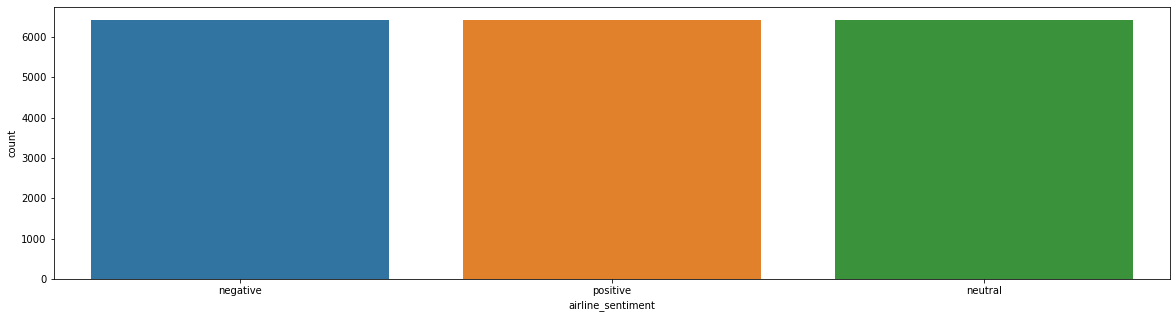

In [51]:
after_smote_airline_sentiment=pd.DataFrame(y_train_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# Here we can see that after applying smote, the data is balanced

**Dividing Test data to Test and Validation Data**

In [52]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation, x_test_main, y_validation, y_test_main = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_validation.shape)
print(x_test_main.shape)


print(y_validation.shape)
print(y_test_main.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


**Initialize RandomForestClassifier**

In [53]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

print ("Training the random forest...")
randomforestclassifier = randomforestclassifier.fit( X_train_SMOTE, y_train_SMOTE)

Training the random forest...


In [54]:
randomforestclassifier.score(X_train_SMOTE, y_train_SMOTE)

0.9379736323056161

**Evaluate score by cross-validation**

In [55]:
print (np.mean(cross_val_score(randomforestclassifier,X_train_SMOTE, y_train_SMOTE,cv=10)))

0.7999686641328533


In [56]:
# Make class predictions for the Validation set
y_validation_predict= randomforestclassifier.predict(x_validation)

**Training and Validation Accuracy**

In [57]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier.score(x_validation, y_validation))
print()

Trainig accuracy 0.9379736323056161

Validation accuracy 0.7588100686498855



**Classification Report**  (Validation Set)

In [58]:
print(metrics.classification_report(y_validation,y_validation_predict))

              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      1331
     neutral       0.61      0.50      0.55       467
    positive       0.70      0.60      0.64       387

    accuracy                           0.76      2185
   macro avg       0.71      0.67      0.68      2185
weighted avg       0.75      0.76      0.75      2185



**Confusion Matrix** (Validation Set)

<Figure size 432x288 with 0 Axes>

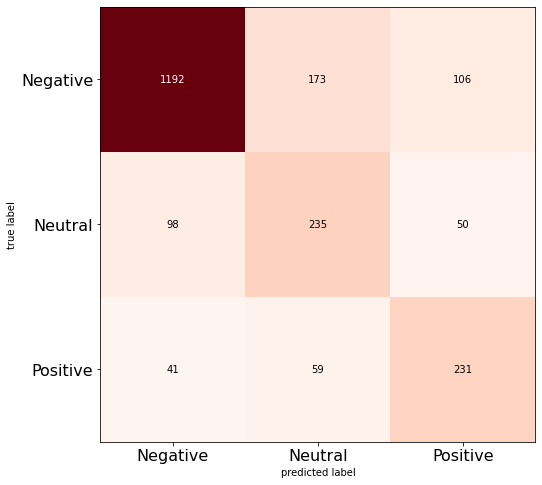

In [85]:
cm=confusion_matrix(y_validation_predict , y_validation)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Testing Data Accuracy**

In [60]:
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

Testing accuracy 0.7662397072278133



**Classification Report**  (Test Set)

In [61]:
# Make class predictions for the Validation set
y_test_predict= randomforestclassifier.predict(x_test_main)

print(metrics.classification_report(y_test_main,y_test_predict))

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1387
     neutral       0.65      0.50      0.56       465
    positive       0.64      0.58      0.61       334

    accuracy                           0.77      2186
   macro avg       0.70      0.66      0.68      2186
weighted avg       0.76      0.77      0.76      2186



**Confusion Matrix** (Test Set)

<Figure size 432x288 with 0 Axes>

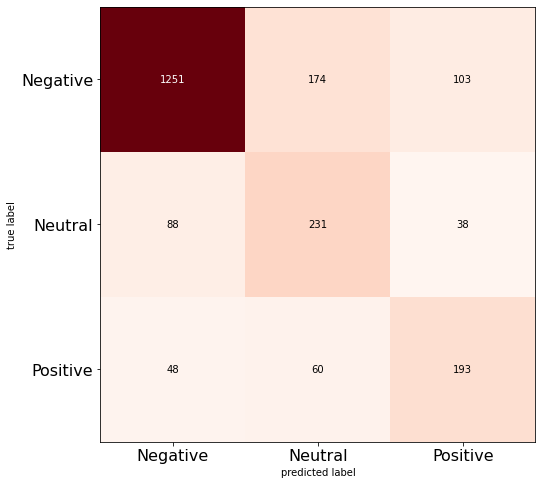

In [86]:
cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Random Forest Classifier on TfidfVectorizer**

**Dividing Data into train and Test**

In [63]:
x_tf_idf = tfidf_vectorizer_data_features     # Predictor feature columns
y_tf_idf = tweet_data_relevant['airline_sentiment']   # Predicted class

x_train_tf_idf, x_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(x_tf_idf, y_tf_idf, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [64]:
print(x_train_tf_idf.shape)
print(y_train_tf_idf.shape)
print(x_test_tf_idf.shape)
print(y_test_tf_idf.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


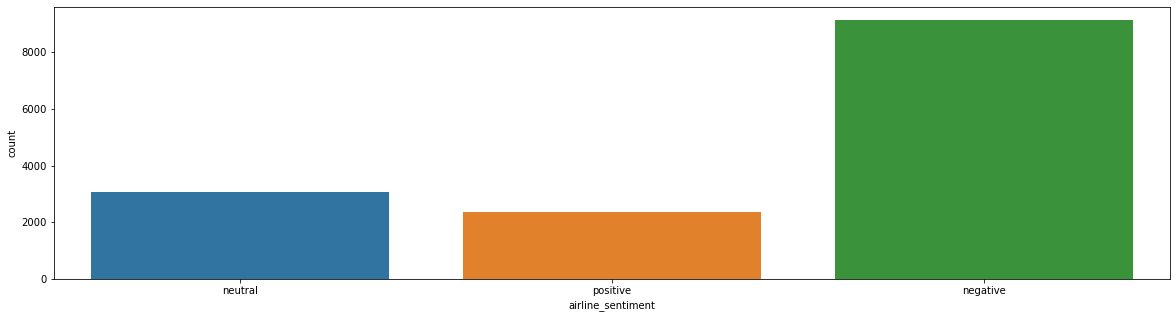

In [65]:
y = tweet_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

**Applying SMOTE since the data is not balanced**

In [66]:
tf_idf_smt = SMOTE(random_state=0)
X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE = smt.fit_sample(x_train_tf_idf, y_train_tf_idf)

In [67]:
print(X_train_tf_idf_SMOTE.shape)
print(y_train_tf_idf_SMOTE.shape)

(19266, 5000)
(19266,)


neutral     6422
negative    6422
positive    6422
Name: airline_sentiment, dtype: int64


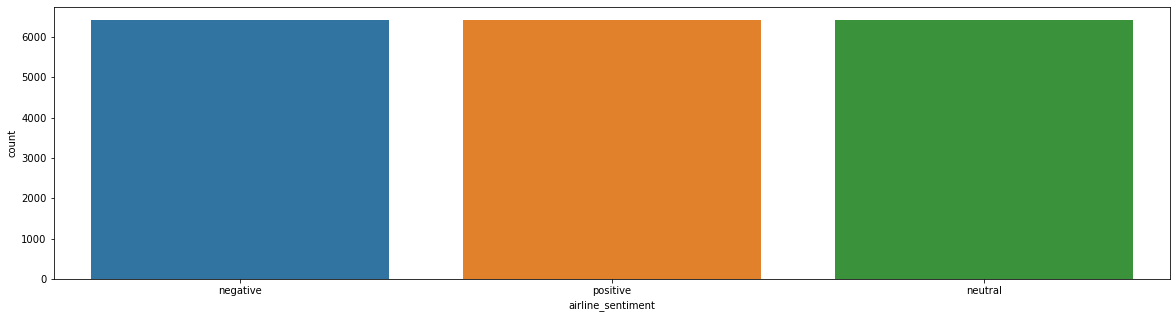

In [68]:
after_smote_airline_sentiment_tf_idf=pd.DataFrame(y_train_tf_idf_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment_tf_idf['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5))
g = sns.countplot(y)
# Here we can see that after smote , the data is balanced

In [69]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation_tf_idf, x_test_main_tf_idf, y_validation_tf_idf, y_test_main_tf_idf = train_test_split(x_test_tf_idf, y_test_tf_idf, test_size=0.50, random_state=1)

print(x_validation_tf_idf.shape)
print(x_test_main_tf_idf.shape)


print(y_validation_tf_idf.shape)
print(y_test_main_tf_idf.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


**Initialize RandomForestClassifier**

In [70]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf_idf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set

print ("Training the random forest...")
randomforestclassifier_tf_idf = randomforestclassifier_tf_idf.fit( X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.2s finished


In [71]:
randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


0.9977680888612063

**Evaluate score by cross-validation**

In [72]:
print (np.mean(cross_val_score(randomforestclassifier_tf_idf,X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE,cv=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]:

0.9133798494477288


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [73]:
# Make class predictions for the Validation set
y_validation_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_validation_tf_idf)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


**Training and Validation Accuracy**

In [74]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier_tf_idf.score(x_validation_tf_idf, y_validation_tf_idf))
print()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Trainig accuracy 0.9977680888612063

Validation accuracy 0.7775743707093822



**Classification Report**  (Validation Set)

In [75]:
print(metrics.classification_report(y_validation_tf_idf,y_validation_predict_tf_idf))

              precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1331
     neutral       0.64      0.50      0.56       467
    positive       0.81      0.61      0.70       387

    accuracy                           0.78      2185
   macro avg       0.75      0.68      0.71      2185
weighted avg       0.77      0.78      0.77      2185



**Confusion Matrix** (Validation Set)

<Figure size 432x288 with 0 Axes>

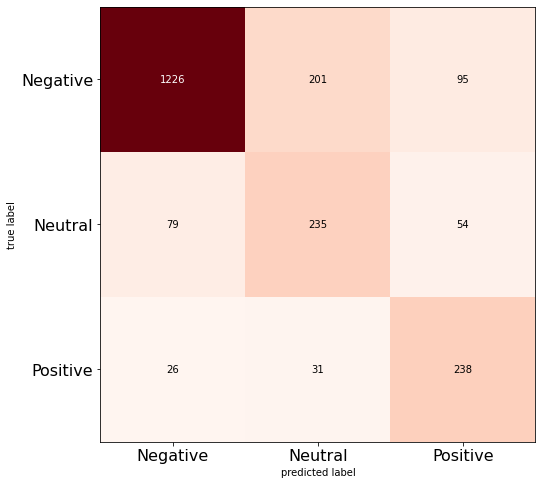

In [87]:
cm=confusion_matrix(y_validation_predict_tf_idf , y_validation_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Test Accuracy**

In [77]:
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

Test accuracy 0.7703568161024703



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


**Classification Report**  (Test Set)

In [78]:
# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1387
     neutral       0.62      0.48      0.54       465
    positive       0.72      0.58      0.64       334

    accuracy                           0.77      2186
   macro avg       0.72      0.66      0.68      2186
weighted avg       0.76      0.77      0.76      2186



**Confusion Matrix** (Test Set)

<Figure size 432x288 with 0 Axes>

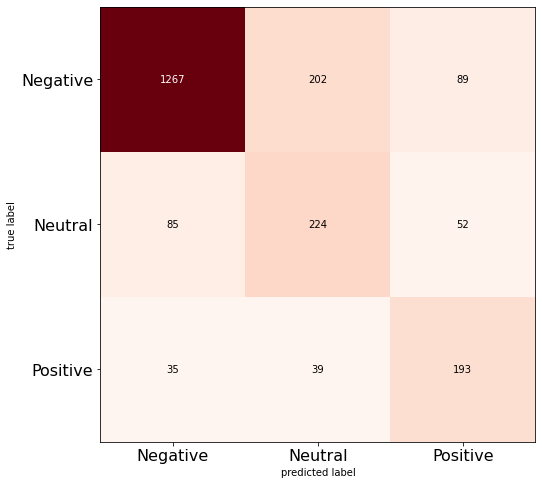

In [88]:
cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

# <font color='blue'>Step 6</font>

**Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset.**


**Summary**

---



**Pre-processing steps in NLP**

In [80]:
# Pre-processing steps in NLP
#      1. HTML tag cleanup
#                          -  It returns all the text in a document or beneath a tag, as a single Unicode string:
#      2. Contraction
#                          - Contractions are shortened version of words or syllables. 
#                          - In case of English contractions are often created by removing one of the vowels from the word. 
#                          - Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.
#      3. Tokenization
#                          - Tokenization is a step which splits longer strings of text into smaller pieces, or tokens. 
#                          - Larger chunks of text can be tokenized into sentences, sentences can be tokenized into words, etc. 
#                          - Further processing is generally performed after a piece of text has been appropriately tokenized. 
#                          - Tokenization is also referred to as text segmentation or lexical analysis.
#                          - Sometimes segmentation is used to refer to the breakdown of a large chunk of text into pieces larger than words (e.g. paragraphs or sentences), 
#                                        while tokenization is reserved for the breakdown process which results exclusively in words.
#      4. Removing numbers
#                          - Remove numbers from list of tokenized words
#      5. Remove special characters
#                          - Remove special characters from list of tokenized words
#      6. Remove punctuation
#                          - Remove punctuation from list of tokenized words
#      7. Convert text to lower case
#                          - converting all text to the same case 
#      8. Remove empty strings
#                          - Remove empty string from list of tokenized words
#      9. Stemming
#                          - Converting the words into their base word or stem word ( Ex - tastefully, tasty, these words are converted to stem word called 'tasti'). 
#                            This reduces the vector dimension because we dont consider all similar words
#      10.Lemmatization
#                          - Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. 
#                            In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

**Techniques for Encoding**

In [81]:
# Steps to do after text pre-processing:
#Techniques for Encoding - These are the popular techniques that are used for encoding:

#       o Bag of words         (CountVectorization)
#                              In BoW we construct a dictionary that contains set of all unique words from our text review dataset. 
#                              The frequency of the word is counted here. If there are d unique words in our dictionary then for every sentence or review the vector will be of length d 
#                              and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.
#       o Tf-idf               (TfIdfVectorization)  (Term Frequency - Inverse Document Frequency)
#                               Term Frequency - Inverse Document Frequency it makes sure that less importance is given to most frequent words and also considers less frequent words.
#                               Term Frequency is number of times a particular word(W) occurs in a review divided by totall number of words (Wr) in review. The term frequency value ranges from 0 to 1.
#                               Inverse Document Frequency is calculated as log(Total Number of Docs(N) / Number of Docs which contains particular word(n)). Here Docs referred as Reviews.
#                               TF-IDF is TF * IDF that is (W/Wr)*LOG(N/n)

**Performance of Classification Model**

**RandomForestClassifier on CountVectorizer**

Trainig accuracy 0.9379736323056161

Testing accuracy 0.7662397072278133

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1387
     neutral       0.65      0.50      0.56       465
    positive       0.64      0.58      0.61       334

    accuracy                           0.77      2186
   macro avg       0.70      0.66      0.68      2186
weighted avg       0.76      0.77      0.76      2186



<Figure size 432x288 with 0 Axes>

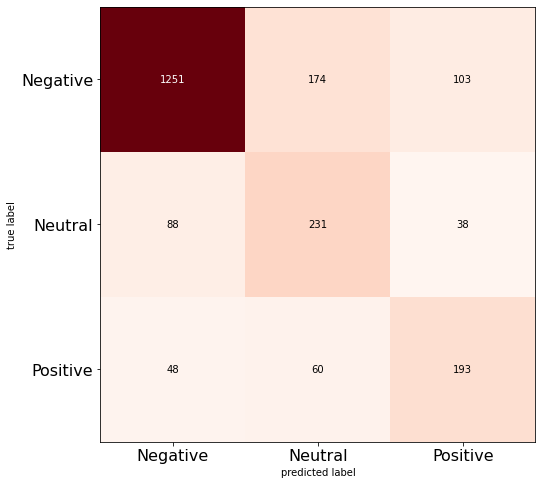

In [89]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

y_test_predict= randomforestclassifier.predict(x_test_main)
print(metrics.classification_report(y_test_main,y_test_predict))

cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**RandomForestClassifier on TfidfVectorizer**

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Trainig accuracy 0.9977680888612063

Test accuracy 0.7703568161024703

              precision    recall  f1-score   support

    negative       0.81      0.91      0.86      1387
     neutral       0.62      0.48      0.54       465
    positive       0.72      0.58      0.64       334

    accuracy                           0.77      2186
   macro avg       0.72      0.66      0.68      2186
weighted avg       0.76      0.77      0.76      2186



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


<Figure size 432x288 with 0 Axes>

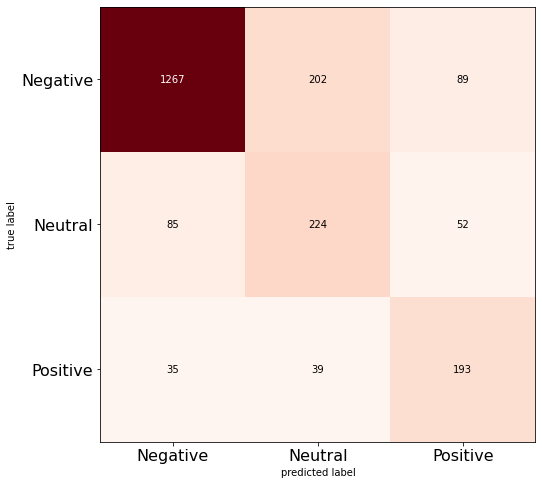

In [90]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
/Users/subrotosingh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


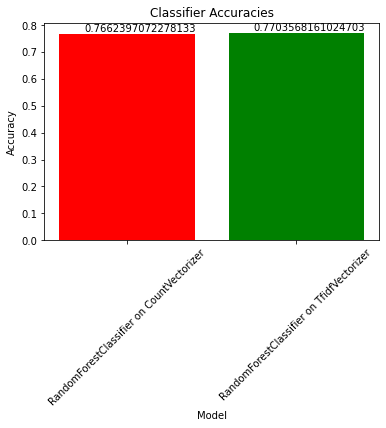

In [84]:
Accuracy=[]
Model=[]
Accuracy.append(randomforestclassifier.score(x_test_main, y_test_main))
Accuracy.append(randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
Model.append("RandomForestClassifier on CountVectorizer")
Model.append("RandomForestClassifier on TfidfVectorizer")


index=[0,1]
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

xlocs, xlabs = plt.xticks()

for i, v in enumerate(Accuracy):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

# The RandomForestClassfier on TfidfVectorizer is having better accuracy

**Summary**

---





*   RandomForestClassifier on TfidfVectorizer has an accuracy of 77% whereas 
RandomForestClassifier on CountVectorizer has an accuracy of 75%. This shows that the model using TfidfVectorizer is better.
*   Model is able to predict airline sentiment correctly 77% of the time
*   United Airlines, US Airways, American Airlines has the most number of negative review
*   Virgin America has the least number of negative reviews
*   Customer service and Late flight seems to be the main reason why customers are giving bad feedback


